# Primer Trabajo Grupal 
## Moises Challco 20220948
## Javier Rebatta 20216291
## Joaquin López 20221484

In [1]:
#Creamos el geodataframe desde el arvhivo leido en la carpeta creada
import os, geopandas as gpd
#Creamos el geodataframe desde el arvhivo leido
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [2]:
#Verificamos
type(countries)

geopandas.geodataframe.GeoDataFrame

In [3]:
countries.shape

(252, 2)

In [4]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [5]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [6]:
#Verificamos las geometrias
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [7]:
#Revisamos si faltan datos, que no hayan NaN
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [8]:
#Revisamos en general los dtypes
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

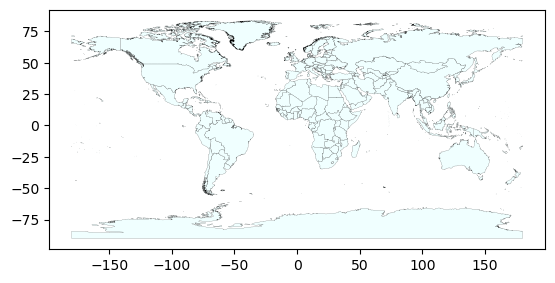

In [9]:
#Visualizando grafica de countries
countries.plot(facecolor="azure",
               edgecolor='black',
               linewidth=0.1)

In [10]:
#Cargamos los datos de rivers y cities desde el repositorio de github 
rivers=gpd.read_file(os.path.join("https://github.com/Controles-ICDEJ/introgeodf/raw/refs/heads/main/maps/World_Hydrography/World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("https://github.com/Controles-ICDEJ/introgeodf/raw/refs/heads/main/maps/World_Cities/World_Cities.shp"))

In [11]:
#Revisamos las geometrias
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

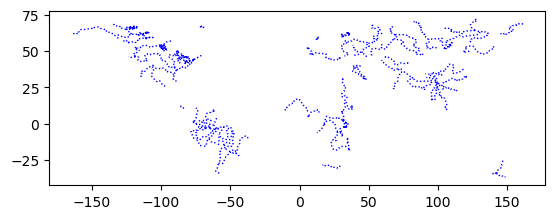

In [12]:
#Visualizamos los graficos respectivos
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

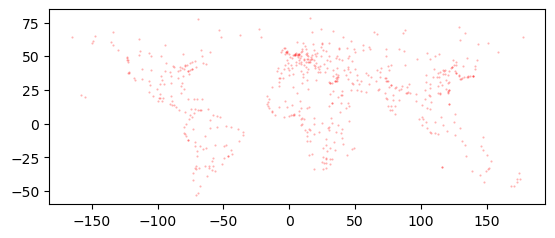

In [13]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [14]:
#Utilizando countries como la base, concatenamos los datos y elaboramos un mapa con rivers y cities

<Axes: >

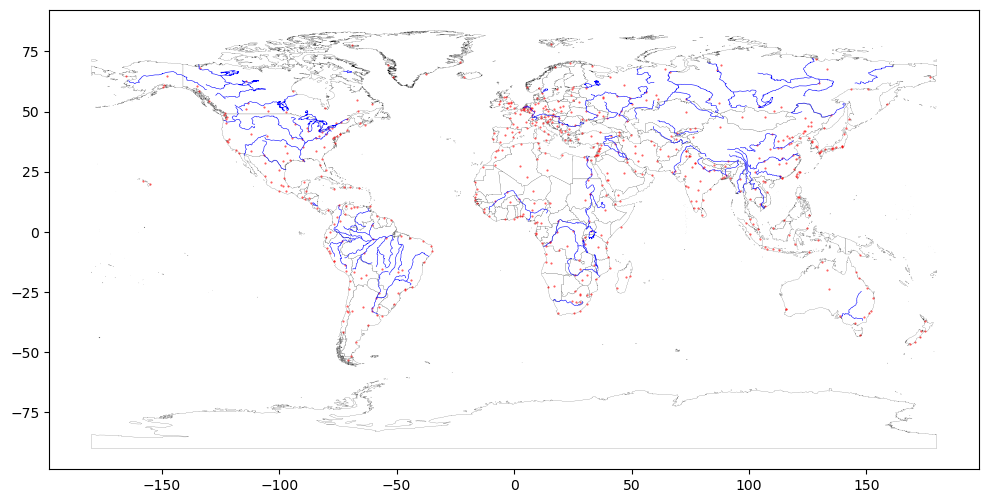

In [15]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [16]:
# Guardamos como GPKG
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

## Primer ejercicio 

In [17]:
## Ahora vamos a elegir el país que nos corresponde: 

In [18]:
Peru = countries[countries.COUNTRY.str.contains('peru', case=False, na=False)]

In [19]:
Peru

,COUNTRY,geometry
172,Peru,"POLYGON ((-69.56750 -10.95056, -69.56844 -10.9..."


In [20]:
#Definimos cities para perú
gpd.clip(cities,Peru)

,NAME,COUNTRY,CAPITAL,geometry
269,Arequipa,Peru,N,POINT (-71.52274 -16.39754)
339,Cuzco,Peru,N,POINT (-71.86000 -13.60000)
529,Lima,Peru,Y,POINT (-76.82355 -12.06800)
317,Callao,Peru,N,POINT (-76.83563 -12.04354)
423,Chimbote,Peru,N,POINT (-78.45315 -8.93010)
260,Iquitos,Peru,N,POINT (-73.19149 -3.75290)
476,Trujillo,Peru,N,POINT (-79.00000 -7.93000)
422,Chiclayo,Peru,N,POINT (-79.83000 -6.62000)


In [21]:
#Definimos rivers para perú
gpd.clip(rivers,Peru)

,NAME,SYSTEM,geometry
59,Purus,Amazon,"LINESTRING (-72.21624 -10.77936, -71.80318 -10..."
1,Amazon,Amazon,"MULTILINESTRING ((-70.36129 -3.78788, -70.3682..."
60,Putamayo,Amazon,"MULTILINESTRING ((-75.29455 -0.12644, -74.9686..."
85,Ucayali,Amazon,"LINESTRING (-71.67654 -15.38325, -71.37376 -15..."
65,Rio Maranon,Amazon,"LINESTRING (-76.49432 -10.32964, -76.52348 -9...."


In [22]:
#Revisamos el sistema de coordenadas
Peru.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

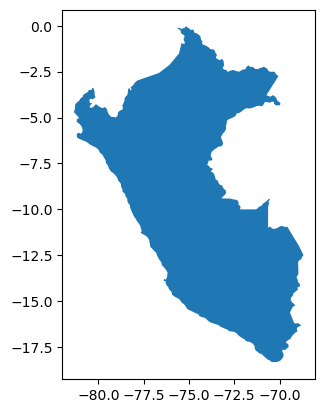

In [23]:
Peru.plot()

In [24]:
#Revisamos las unidades de medida del sistema de coordenadas
Peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [25]:
#Preguntamos acá si está proyectada 
Peru.crs.is_projected

False

In [26]:
#Revisamos el centroide
Peru.centroid 

C:\Users\joaqu\AppData\Local\Temp\ipykernel_19500\2281830488.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [27]:
#El error que sale confirma que el pais no se encuentre bien proyectado, por lo que debemos hacer la reproyección: 

In [28]:
##REPROJECTION 

In [29]:
#Cambiamos a metros
Peru.to_crs(24891).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [30]:
#En el centroide
Peru.to_crs(24891).centroid

172    POINT (893956.209 1073003.180)
dtype: geometry

In [31]:
#Creamos una base nueva para el país con su nueva proyección recomendada

<Axes: >

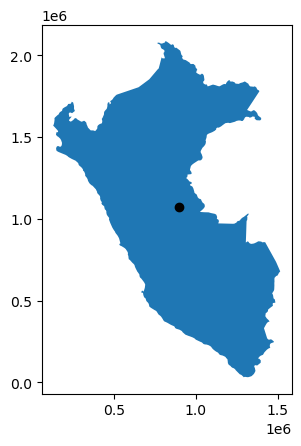

In [32]:
base24891 = Peru.to_crs(24891).plot()
Peru.to_crs(24891).centroid.plot(color='black',ax=base24891)

In [33]:
#Reproyectando rivers y cities 

In [34]:
Peru_24891=Peru.to_crs(24891)

In [35]:
citiesPeru_clipped=gpd.clip(cities,Peru)

In [36]:
cities_Peru_24891=citiesPeru_clipped.to_crs(Peru_24891.crs)

In [37]:
riversPeru_clipped=gpd.clip(rivers,Peru)

In [38]:
rivers_Peru_24891=riversPeru_clipped.to_crs(Peru_24891.crs)

In [39]:
Peru_24891

,COUNTRY,geometry
172,Peru,"POLYGON ((1423874.178 857804.844, 1423768.489 ..."


In [40]:
cities_Peru_24891

,NAME,COUNTRY,CAPITAL,geometry
269,Arequipa,Peru,N,POINT (1184391.514 255825.681)
339,Cuzco,Peru,N,POINT (1160298.076 570004.745)
529,Lima,Peru,Y,POINT (622711.821 753495.215)
317,Callao,Peru,N,POINT (621430.857 756222.948)
423,Chimbote,Peru,N,POINT (447367.867 1102592.897)
260,Iquitos,Peru,N,POINT (1036168.250 1672257.444)
476,Trujillo,Peru,N,POINT (387631.661 1213510.506)
422,Chiclayo,Peru,N,POINT (296326.072 1358612.104)


In [41]:
rivers_Peru_24891

,NAME,SYSTEM,geometry
59,Purus,Amazon,"LINESTRING (1131054.221 886360.832, 1176563.29..."
1,Amazon,Amazon,"MULTILINESTRING ((1354163.098 1665135.135, 135..."
60,Putamayo,Amazon,"MULTILINESTRING ((802419.846 2076530.727, 8388..."
85,Ucayali,Amazon,"LINESTRING (1172614.703 369928.966, 1206823.39..."
65,Rio Maranon,Amazon,"LINESTRING (661246.427 945690.747, 659626.587 ..."


In [42]:
#Graficando: 

<Axes: >

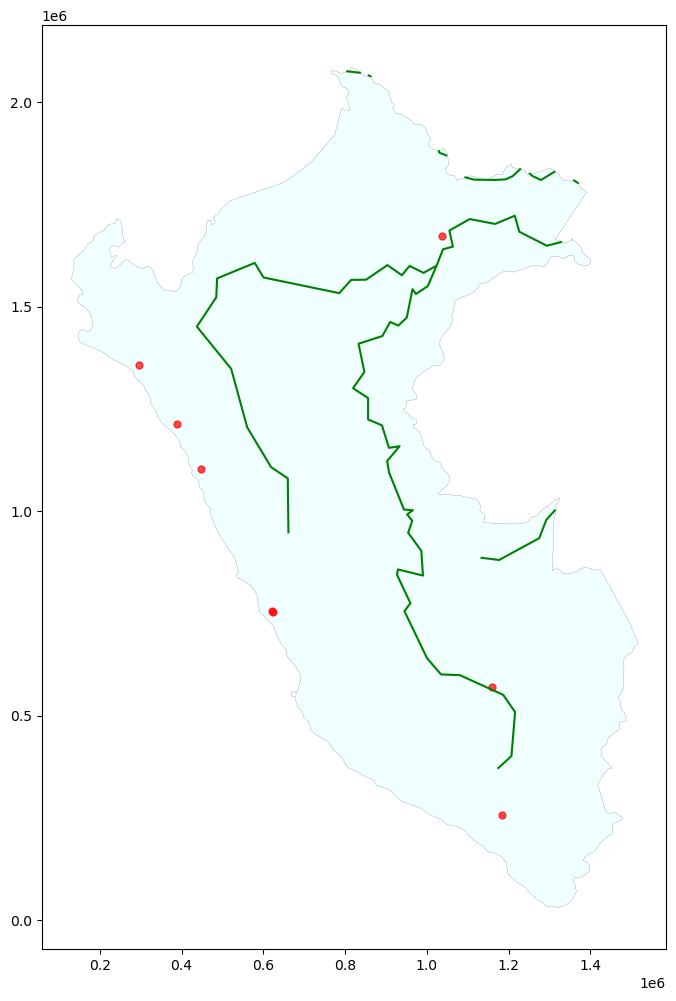

In [43]:
base = Peru_24891.plot(facecolor="azure",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))
rivers_Peru_24891.plot(edgecolor='Green', linewidth=1.5,
            ax=base)# on top of...
cities_Peru_24891.plot(marker='.', color='RED', markersize=100,alpha=0.7,
            ax=base) # on top of...

In [44]:
##Guardamos todo en un layer 

In [45]:

import os

Peru_24891.to_file(os.path.join("maps","PeruMaps_24891.gpkg"), layer='country', driver="GPKG")
cities_Peru_24891.to_file(os.path.join("maps","PeruMaps_24891.gpkg"), layer='cities', driver="GPKG")
rivers_Peru_24891.to_file(os.path.join("maps","PeruMaps_24891.gpkg"), layer='rivers', driver="GPKG")
Peru_24891.centroid.to_file(os.path.join("maps","PeruMaps_24891.gpkg"), layer='centroid', driver="GPKG")

## Segundo ejercicio 

In [46]:
#Se descargaron los datos para los aeropuertos de Peru y se crea un dataframe que lea estos datos
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","pe-airports.csv"))

#Limpiamos la data

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] 

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.0219,-77.114305,113,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
2,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535699844400002,-71.9387969971,10860,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
3,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.3411006927,-71.5830993652,8405,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
202,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.3515,-74.5819,505,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
203,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.92859,-73.9877,1496,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
204,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.14793,-74.30629,1056,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
205,351492,PE-0018,heliport,Tanquin Heliport,-12.12632,-74.07599,1880,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [47]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.0219,-77.114305,113,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535699844400002,-71.9387969971,10860,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.3411006927,-71.5830993652,8405,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100143432617,-70.158203125,12552,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
4,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854,-74.961502,1860,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00


In [48]:
#Nos quedamos con las columnas necesarias

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [49]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           205 non-null    object
 1   type           205 non-null    object
 2   latitude_deg   205 non-null    object
 3   longitude_deg  205 non-null    object
 4   elevation_ft   193 non-null    object
 5   region_name    205 non-null    object
 6   municipality   198 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [50]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [51]:
#ahora revisamos
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           205 non-null    object 
 1   type           205 non-null    object 
 2   latitude_deg   205 non-null    float64
 3   longitude_deg  205 non-null    float64
 4   elevation_ft   193 non-null    float64
 5   region_name    205 non-null    object 
 6   municipality   198 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.3+ KB


In [52]:
#Creamos el geodataframe
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=Peru.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

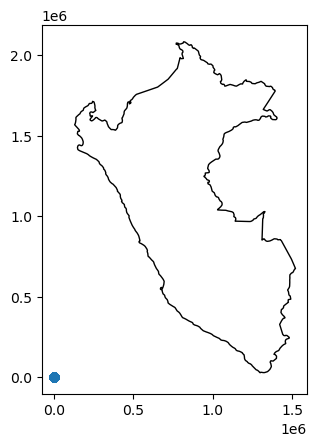

In [53]:
#Visualizamos

base = Peru_24891.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [54]:
#Esto ocurre porque no esta bien proyectado
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

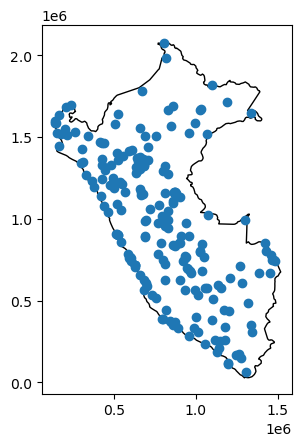

In [55]:
#Reproyectando
airports_24891=airports.to_crs(24891)

#Verificamos

base = Peru_24891.plot(color='white', edgecolor='black')
airports_24891.plot(ax=base)

In [56]:
airports_24891['type'].value_counts() #frecuencias

type
small_airport     143
medium_airport     29
closed             25
heliport            6
large_airport       2
Name: count, dtype: int64

In [57]:
#Renombramos por conveniencia
airports_24891.rename(columns={'type':'kind'},inplace=True)

#en GPKG
airports_24891.to_file(os.path.join("maps","PeruMaps_24891.gpkg"), layer='airports', driver="GPKG")

In [58]:
airports_24891

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Jorge Chávez International Airport,large_airport,-12.021900,-77.114305,113.0,Lima Region,Lima,POINT (591068.851 759010.838)
1,Alejandro Velasco Astete International Airport,large_airport,-13.535700,-71.938797,10860.0,Cuzco Region,Cusco,POINT (1151939.195 577495.537)
2,Rodríguez Ballón International Airport,medium_airport,-16.341101,-71.583099,8405.0,Arequipa Region,Arequipa,POINT (1178157.179 262424.347)
3,Inca Manco Capac International Airport,medium_airport,-15.467100,-70.158203,12552.0,Puno Region,Juliaca,POINT (1337130.244 353130.873)
4,Maria Reiche Neuman Airport,medium_airport,-14.854000,-74.961502,1860.0,Ica Region,Nazca,POINT (819040.718 440591.578)
...,...,...,...,...,...,...,...,...
200,Aldora Airport,closed,-5.151760,-80.947370,NaN,Piura Region,Paita,POINT (172652.502 1520985.673)
201,Pucallpa Air Force Heliport,heliport,-8.351500,-74.581900,505.0,Ucayali Region,Pucallpa,POINT (875124.554 1162291.417)
202,Puerto Anapati Heliport,heliport,-11.928590,-73.987700,1496.0,Junín Region,Puerto Anapati,POINT (932941.054 763229.984)
203,Puerto Ocopa Heliport,heliport,-11.147930,-74.306290,1056.0,Junín Region,Puerto Ocopa,POINT (899928.640 850844.534)


## Tercer ejercicio 

<Axes: >

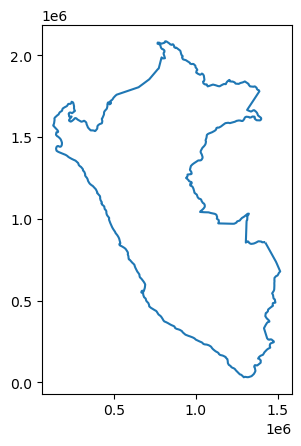

In [59]:
#La frontera
Peru_24891.boundary.plot()

In [60]:
Peru_24891.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 172 to 172
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [61]:
#Conversion
Peru_border=Peru_24891.boundary.to_frame()

#Nueva columna
Peru_border['name']='Peru'

#Renombramos
Peru_border.rename(columns={0:'geometry'},inplace=True)

#Establecemos geometria
Peru_border = Peru_border.set_geometry("geometry")

#Verificamos
Peru_border.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [62]:
Peru_border

,geometry,name
172,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


## Cuarto ejercicio 

In [63]:
#Descargamos los archivos pertinentes 

#Creamos geodataframe desde estos archivos

In [64]:
Peru_states=gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm1_ign_20200714.shp"))
Peru_municipalities=gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm2_ign_20200714.shp"))

In [65]:
Peru_states

,Shape_Leng,Shape_Area,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,12.894071,3.203362,Amazonas,PE01,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,11.640227,2.954639,Ancash,PE02,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,7.730082,1.765933,Apurimac,PE03,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,16.964447,5.335260,Arequipa,PE04,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,16.754483,3.649287,Ayacucho,PE05,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."
5,12.371207,2.684140,Cajamarca,PE06,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629..."
6,1.076171,0.011647,Callao,PE07,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8..."
7,21.451791,6.004862,Cusco,PE08,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2..."
8,9.565804,1.839898,Huancavelica,PE09,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9..."
9,14.595406,3.089577,Huanuco,PE10,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305..."


In [66]:
Peru_municipalities

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,3.535264,0.288842,Abancay,PE0301,None,None,None,Apurimac,PE03,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-72.91562 -13.38567, -72.91522 -13.3..."
1,1.761271,0.077181,Acobamba,PE0902,None,None,None,Huancavelica,PE09,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-74.68484 -12.59058, -74.68400 -12.5..."
2,1.625998,0.077840,Acomayo,PE0802,None,None,None,Cusco,PE08,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-71.75329 -13.71072, -71.75275 -13.7..."
3,1.576139,0.057312,Aija,PE0202,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.61368 -9.64900, -77.61241 -9.649..."
4,9.964011,1.569570,Alto Amazonas,PE1602,None,None,None,Loreto,PE16,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-76.30752 -3.69827, -76.30538 -3.698..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3.414807,0.301437,Yauli,PE1208,None,None,None,Junin,PE12,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-76.38287 -11.07490, -76.38309 -11.0..."
192,4.338329,0.581513,Yauyos,PE1510,None,None,None,Lima,PE15,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-75.97323 -11.98432, -75.97220 -11.9..."
193,2.661169,0.112125,Yungay,PE0220,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.57344 -8.90092, -77.57245 -8.901..."
194,1.839592,0.035238,Yunguyo,PE2113,None,None,None,Puno,PE21,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"MULTIPOLYGON (((-68.81422 -16.34799, -68.91839..."


In [67]:
#Verificamos
type(Peru_states), type(Peru_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [68]:
Peru_states.geometry.head()

0    POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...
1    POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...
2    POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...
3    POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...
4    POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...
Name: geometry, dtype: geometry

In [69]:
Peru_municipalities.geometry.head()

0    POLYGON ((-72.91562 -13.38567, -72.91522 -13.3...
1    POLYGON ((-74.68484 -12.59058, -74.68400 -12.5...
2    POLYGON ((-71.75329 -13.71072, -71.75275 -13.7...
3    POLYGON ((-77.61368 -9.64900, -77.61241 -9.649...
4    POLYGON ((-76.30752 -3.69827, -76.30538 -3.698...
Name: geometry, dtype: geometry

In [70]:
Peru_states.crs, Peru_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

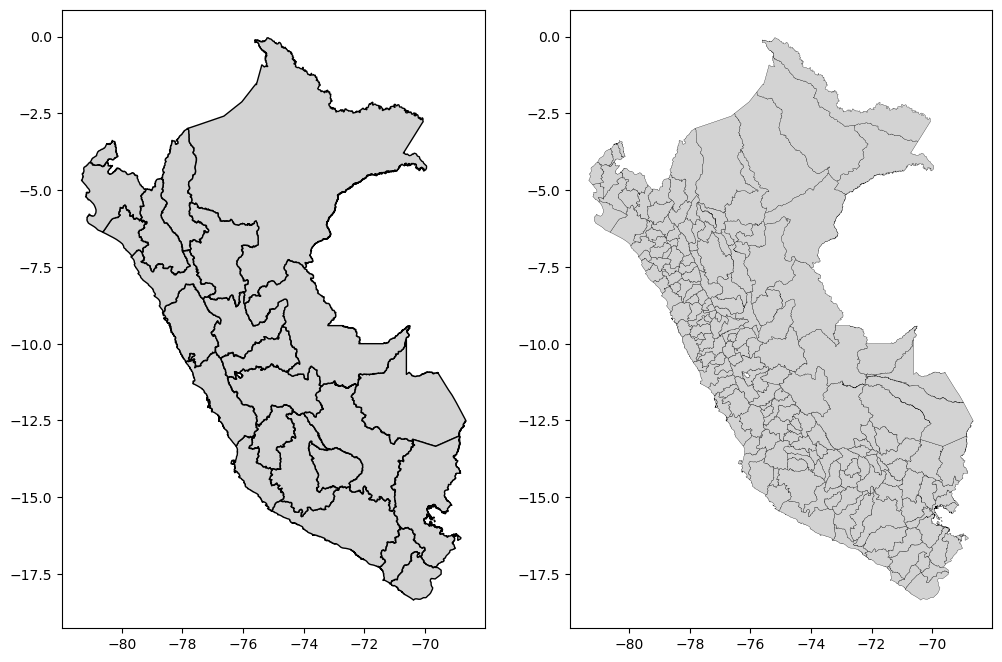

In [71]:
#Importamos la biblioteca
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))
#Visualizamos states y municipalities
Peru_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
Peru_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [72]:
#Set as unoproject

In [73]:
#Indicamos el crs
Peru_states.crs = "EPSG:4326"
Peru_municipalities.crs = "EPSG:4326"

In [74]:
#Ahora proyectamos: 

In [75]:
Peru_states=Peru_states.to_crs(24891)
Peru_municipalities=Peru_municipalities.to_crs(24891)

In [76]:
Peru_states.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [77]:
Peru_municipalities.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

## Quinto ejercicio 

In [78]:
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [79]:
#Se utilizará el fragility cia link
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [80]:
#Queremos hacer un merge 

In [81]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [82]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [83]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [84]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [85]:
#Intalamos defuzz 

In [10]:
pip install thefuzz 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [11]:
pip show thefuzz

Name: thefuzz
Version: 0.22.1
Summary: Fuzzy string matching in python
Home-page: https://github.com/seatgeek/thefuzz
Author: Adam Cohen
Author-email: adam@seatgeek.com
License: MIT
Location: C:\Users\joaqu\AppData\Roaming\Python\Python312\site-packages
Requires: rapidfuzz
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [86]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORT

In [87]:
#Estamos buscando las coincidencias de los nombres en cada data frame 

In [88]:
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (T

In [89]:
#AHora hacemos un diccionario con los cambios realizados 

In [90]:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}

In [91]:
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',


In [92]:
#Hacemos cambios y actualizamos, llamamos a fragility 

In [93]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

In [94]:

onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('MARTINIQUE (FRANCE)', 60)),
 ('KOREA (THE REPUBLIC OF)', ('CZECH REPUBLIC', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [95]:
#Ahora

In [96]:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'ESWATINI': 'MARTINIQUE (FRANCE)',
 'KOREA (THE REPUBLIC OF)': 'CZECH REPUBLIC',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)": 'CZECH REPUBLIC',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [97]:
#Cambio
fragilityCia.replace(to_replace={'Country':try2},inplace=True)


onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)


[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [98]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column

In [99]:
#Entonces quedaria asi
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


In [100]:
#pasamos a la parte de los cloropletos 

In [101]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [102]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


In [24]:
#instalamos seaborn
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


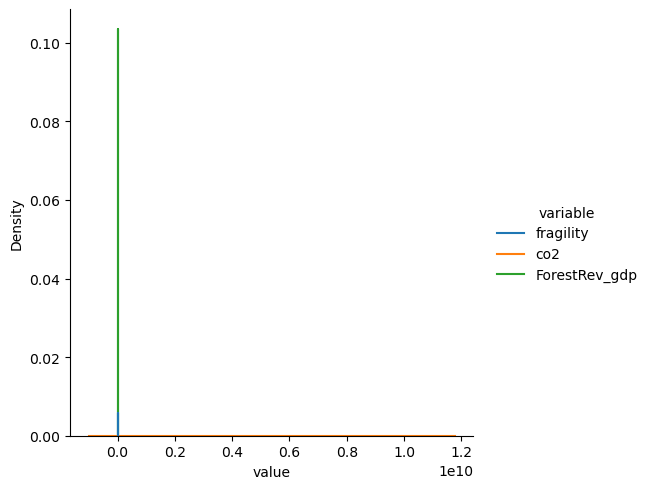

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [26]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 12.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 14.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 10.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 11.4 MB/s eta 0:00:00


In [104]:
#Aplicamos scalers

#Estandar SCALER 

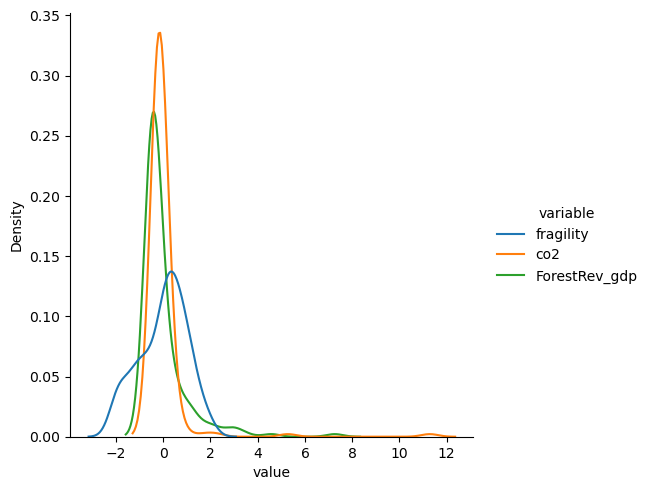

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [106]:
#Mimax scaler 

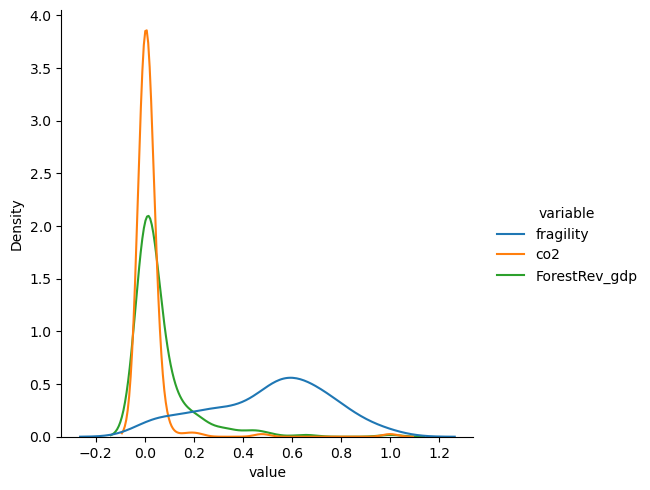

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [108]:
#Robust Scaler 

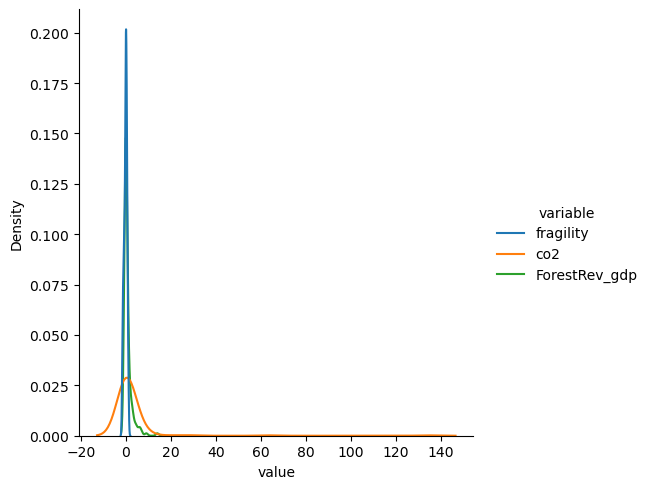

In [109]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [110]:
#Quantile Trasformer 

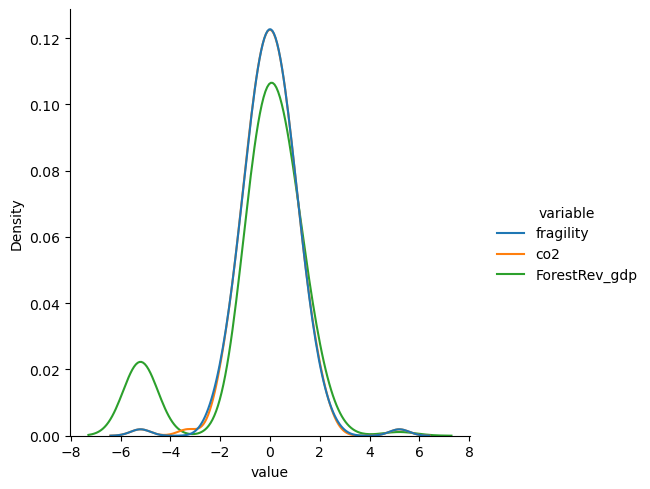

In [111]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [112]:
#Nos quedamos con quantile traformer 

In [113]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

# Discretizing 

In [33]:
!pip show numba mapclassify numpy

Name: mapclassify
Version: 2.8.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: C:\ProgramData\anaconda3\envs\CienciaDatosPUCP\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other mater

In [34]:
!pip install numba 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------------------ --------- 2.1/2.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---- ----------------------------------- 3.1/28.1 MB 15.3 MB/s eta 0:00:02
   --------- ------------------------------ 6.8/28.1 MB 16.1 MB/s eta 0:00:02
   -------------- ------------------------- 10.5/28.1 MB 16.8 MB/s eta 0:00:02
   -------------------- ------------------- 14.2/28.1 MB 16.8 MB/s eta 0:00:01
   ------------------------ --------------- 17.6/28.1 MB 16.8 MB/s eta 0:00:01
   ------------------------------ --------- 21.2/28.1 MB 16.8 MB/s eta 0:00:01
   ---------------------------------- ----- 24.4/28.1 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------  28.0/28.1 MB 16.5 MB/s eta 0:00:01

In [36]:
!pip install pysal

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ------------------ --------------------- 2.6/5.7 MB 13.7 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.7 MB 14.0 MB/s eta 0:00:01
     ---------------------------------------- 5.7/5.7 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 7.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ----- ----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [114]:
import mapclassify
import numpy as np

np.random.seed(12345)

#intervalos
K=5
theVar=theMapAndData.fragility_Qt
#intervalos iguales
ei5 = mapclassify.EqualInterval(theVar, k=K)

msd = mapclassify.StdMean(theVar)
# el rango de los intervalos varia
q5=mapclassify.Quantiles(theVar,k=K)

# para multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# para skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no se necesita k
# optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

In [115]:
#Seleccionamos la mejor clasificación 

In [116]:
class5 = [ei5, msd, q5, mb5, ht, fj5, jc5, mp5]

# ADCM 
fits = np.array([c.adcm for c in class5])

#En un dataframe
adcms = pd.DataFrame(fits)

adcms['classifier'] = [c.name for c in class5]

adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

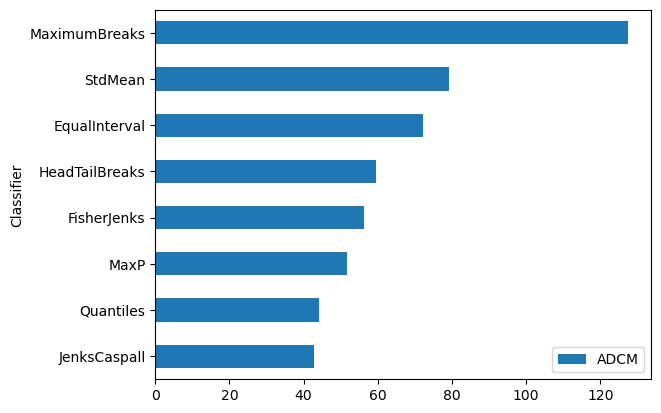

In [117]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [118]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [119]:
#Revisamos
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.530113,1
1,1.827146,4
2,0.304520,3
3,0.233695,2
4,-0.424447,1


In [120]:
indexList=['fragility_Qt_jc5']
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.685317
1,1,-0.652170
2,2,-0.006005
3,3,0.614405
4,4,1.618874


In [121]:
#creamos nueva columa: 

In [122]:
# Renombrando
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)


theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.530113,1,1_Good
1,1.827146,4,4_Poor
2,0.304520,3,3_Bad
3,0.233695,2,2_Middle
4,-0.424447,1,1_Good
5,-0.179018,2,2_Middle
6,0.963642,3,3_Bad
7,-0.284496,2,2_Middle
8,-0.760554,1,1_Good
9,-1.963511,0,0_Great


In [123]:
#Vamos a hacer el coropleto 

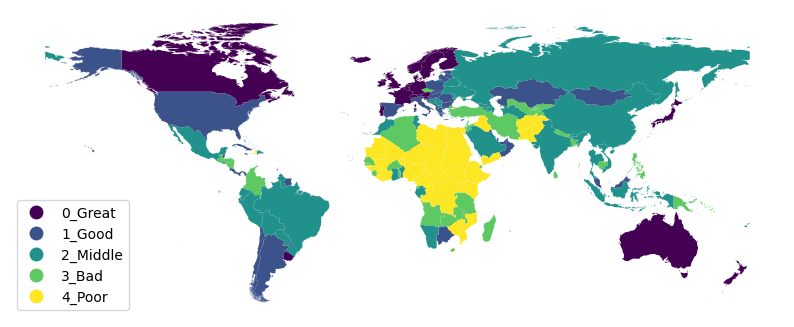

In [124]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable 
                   cmap='viridis', # coloracion
                   categorical=True, 
                   edgecolor='white', #color borde
                   linewidth=0., # ancho del borde
                   alpha=1, # transparency
                   legend=True, 
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

In [125]:
#Una vez q2ue conoces el ADCM, puedes solicitar un coropleto sin crear una variable 

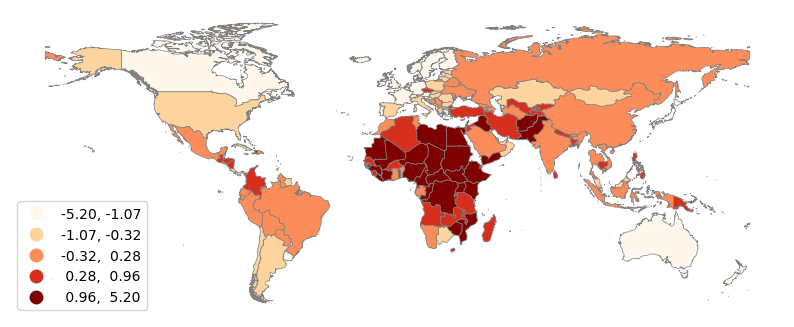

In [126]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [127]:
# Finalmente
theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")